import data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data
file_path = '/content/drive/MyDrive/mxmh_survey_results.csv'
data = pd.read_csv(file_path)

data observation

In [4]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [6]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

##Data Pre-processing

remove n/a

In [7]:
# too mant na in BPM
data = data.drop(['BPM'], axis=1)

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     718 non-null    object 
 1   Age                           718 non-null    float64
 2   Primary streaming service     718 non-null    object 
 3   Hours per day                 718 non-null    float64
 4   While working                 718 non-null    object 
 5   Instrumentalist               718 non-null    object 
 6   Composer                      718 non-null    object 
 7   Fav genre                     718 non-null    object 
 8   Exploratory                   718 non-null    object 
 9   Foreign languages             718 non-null    object 
 10  Frequency [Classical]         718 non-null    object 
 11  Frequency [Country]           718 non-null    object 
 12  Frequency [EDM]               718 non-null    object 
 13  Frequency 

Add new column: "fav_frequently"==1 if listen to favorite genre of music very frequently, 0 if not listen to favorite genre of music very frequently.

In [11]:
data['fav_frequently'] = 0

# 條件判斷並設置新列
data.loc[(data['Fav genre'] == "Classical") & (data['Frequency [Classical]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Country") & (data['Frequency [Country]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "EDM") & (data['Frequency [EDM]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Folk") & (data['Frequency [Folk]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Gospel") & (data['Frequency [Gospel]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Hip hop") & (data['Frequency [Hip hop]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Jazz") & (data['Frequency [Jazz]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Lofi") & (data['Frequency [Lofi]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Metal") & (data['Frequency [Metal]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Pop") & (data['Frequency [Pop]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "R&B") & (data['Frequency [R&B]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Rap") & (data['Frequency [Rap]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Rock") & (data['Frequency [Rock]'] == "Very frequently"), 'fav_frequently'] = 1
data.loc[(data['Fav genre'] == "Video game music") & (data['Frequency [Video game music]'] == "Very frequently"), 'fav_frequently'] = 1
# 查看更新後的數據頭部
print(data.head())

            Timestamp   Age Primary streaming service  Hours per day  \
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   
5  8/27/2022 21:56:50  18.0                   Spotify            5.0   
6  8/27/2022 22:00:29  18.0             YouTube Music            3.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   
5           Yes             Yes      Yes              Jazz         Yes   
6           Yes             Yes       No  Video game music         Yes   

  Foreign languages  ...  Frequency [Rap] Frequency [Rock]  \
2               Yes  ...           Rarely           Rarely  

Add new column：'Is_Loud_Music，1 for fav genre is loud music, and 0 for fav genre is not loud music

In [12]:
# define loud_genres
loud_genres = {'Rock', 'Metal', 'Hip hop', 'Rap', 'EDM', 'K pop', 'Pop', 'Video game music'}

# add column 'Is_Loud_Music'
data['Is_Loud_Music'] = data['Fav genre'].apply(lambda x: 1 if x in loud_genres else 0)

print(data)

               Timestamp   Age Primary streaming service  Hours per day  \
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
5     8/27/2022 21:56:50  18.0                   Spotify            5.0   
6     8/27/2022 22:00:29  18.0             YouTube Music            3.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
2              No      

identify the variables to consider"

In [13]:
df = data.drop(['Timestamp', 'Primary streaming service', 'Permissions', 'Fav genre'], axis=1)

convert string to int

In [14]:
# Ensure all columns are correctly named and exist
expected_columns = [
    'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
    'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
    'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
    'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
    'Frequency [Video game music]'
]

value_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Very frequently": 3
}

# Checking and replacing in each column
for column in expected_columns:
    if column in df.columns:
        df[column] = df[column].replace(value_mapping)
    else:
        print(f"Column {column} does not exist in DataFrame.")

# Print the updated DataFrame to verify changes
print(df)

      Age  Hours per day While working Instrumentalist Composer Exploratory  \
2    18.0            4.0            No              No       No          No   
3    61.0            2.5           Yes              No      Yes         Yes   
4    18.0            4.0           Yes              No       No         Yes   
5    18.0            5.0           Yes             Yes      Yes         Yes   
6    18.0            3.0           Yes             Yes       No         Yes   
..    ...            ...           ...             ...      ...         ...   
731  17.0            2.0           Yes             Yes       No         Yes   
732  18.0            1.0           Yes             Yes       No         Yes   
733  19.0            6.0           Yes              No      Yes         Yes   
734  19.0            5.0           Yes             Yes       No          No   
735  29.0            2.0           Yes              No       No         Yes   

    Foreign languages  Frequency [Classical]  Frequ

In [15]:
# Ensure all columns are correctly named and exist
expected_columns = ['While working','Instrumentalist','Composer','Foreign languages','Exploratory']

value_mapping = {
    "No": 0,
    "Yes": 1,
}
# Checking and replacing in each column
for column in expected_columns:
    if column in df.columns:
        df[column] = df[column].replace(value_mapping)
    else:
        print(f"Column {column} does not exist in DataFrame.")

# Print the updated DataFrame to verify changes
print(df)

      Age  Hours per day  While working  Instrumentalist  Composer  \
2    18.0            4.0              0                0         0   
3    61.0            2.5              1                0         1   
4    18.0            4.0              1                0         0   
5    18.0            5.0              1                1         1   
6    18.0            3.0              1                1         0   
..    ...            ...            ...              ...       ...   
731  17.0            2.0              1                1         0   
732  18.0            1.0              1                1         0   
733  19.0            6.0              1                0         1   
734  19.0            5.0              1                1         0   
735  29.0            2.0              1                0         0   

     Exploratory  Foreign languages  Frequency [Classical]  \
2              0                  1                      0   
3              1                  1

In [16]:
# Ensure all columns are correctly named and exist
expected_columns = ['Music effects']

value_mapping = {
    "Worsen": 0,
    "No effect": 1,
    "Improve": 2,
}
# Checking and replacing in each column
for column in expected_columns:
    if column in df.columns:
        df[column] = df[column].replace(value_mapping)
    else:
        print(f"Column {column} does not exist in DataFrame.")

# Print the updated DataFrame to verify changes
print(df)

      Age  Hours per day  While working  Instrumentalist  Composer  \
2    18.0            4.0              0                0         0   
3    61.0            2.5              1                0         1   
4    18.0            4.0              1                0         0   
5    18.0            5.0              1                1         1   
6    18.0            3.0              1                1         0   
..    ...            ...            ...              ...       ...   
731  17.0            2.0              1                1         0   
732  18.0            1.0              1                1         0   
733  19.0            6.0              1                0         1   
734  19.0            5.0              1                1         0   
735  29.0            2.0              1                0         0   

     Exploratory  Foreign languages  Frequency [Classical]  \
2              0                  1                      0   
3              1                  1

define X, y and standardilze 'Age'

In [17]:
X = df.drop('Music effects', axis=1)
from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X['Age'] = scaler.fit_transform(X['Age'].values.reshape(-1, 1))
X_new = X.values
X_new

array([[0.10126582, 4.        , 0.        , ..., 2.        , 1.        ,
        1.        ],
       [0.64556962, 2.5       , 1.        , ..., 3.        , 1.        ,
        0.        ],
       [0.10126582, 4.        , 1.        , ..., 9.        , 1.        ,
        0.        ],
       ...,
       [0.11392405, 6.        , 1.        , ..., 2.        , 0.        ,
        1.        ],
       [0.11392405, 5.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.24050633, 2.        , 1.        , ..., 5.        , 1.        ,
        1.        ]])

In [18]:
y = df['Music effects']

#EDA

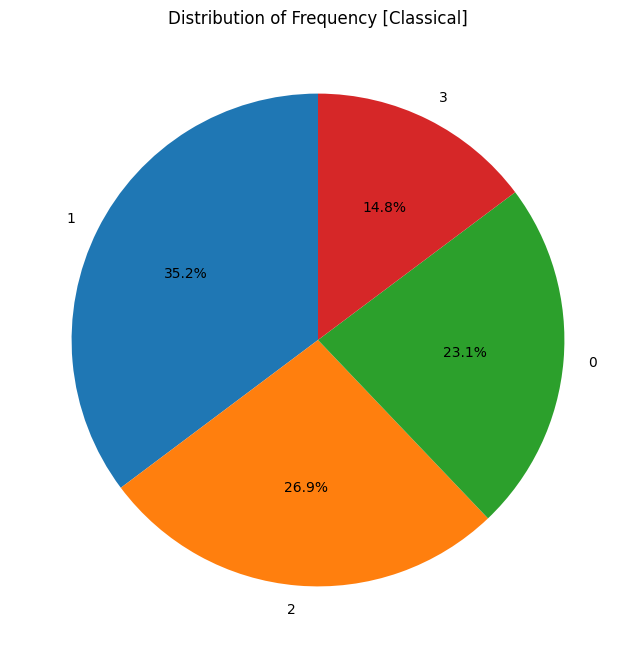

In [19]:
counts = df['Frequency [Classical]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Classical]')
plt.show()

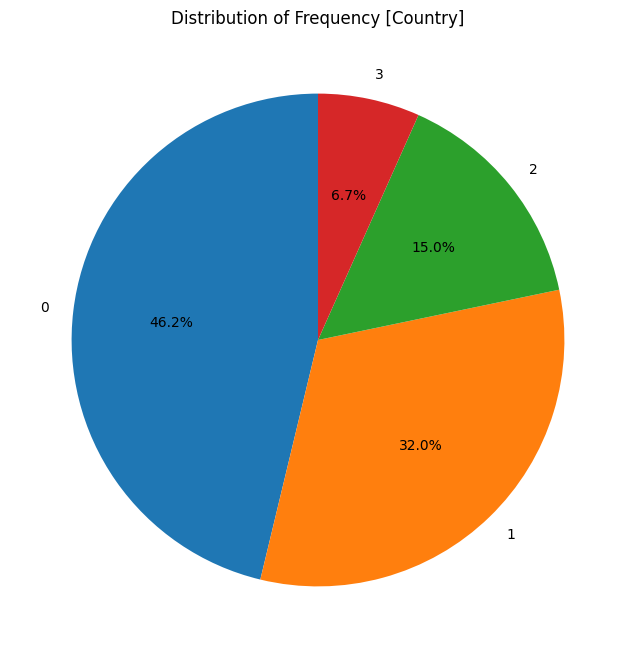

In [20]:
counts = df['Frequency [Country]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Country]')
plt.show()

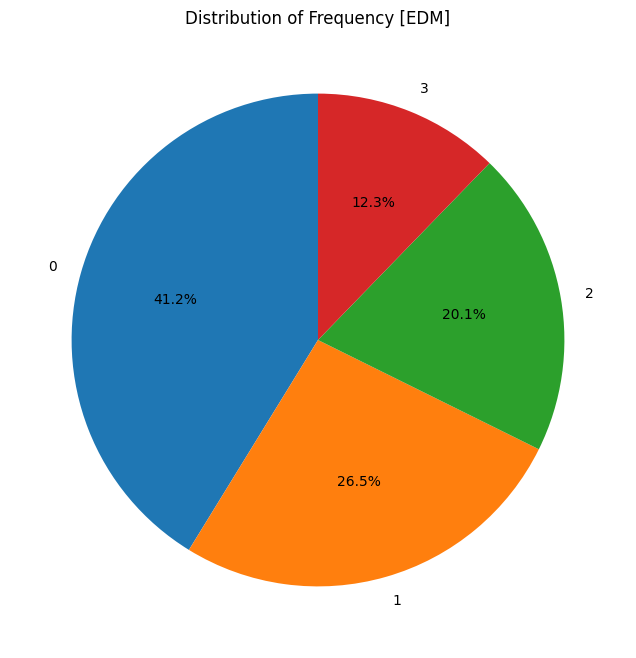

In [21]:
counts = df['Frequency [EDM]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [EDM]')
plt.show()

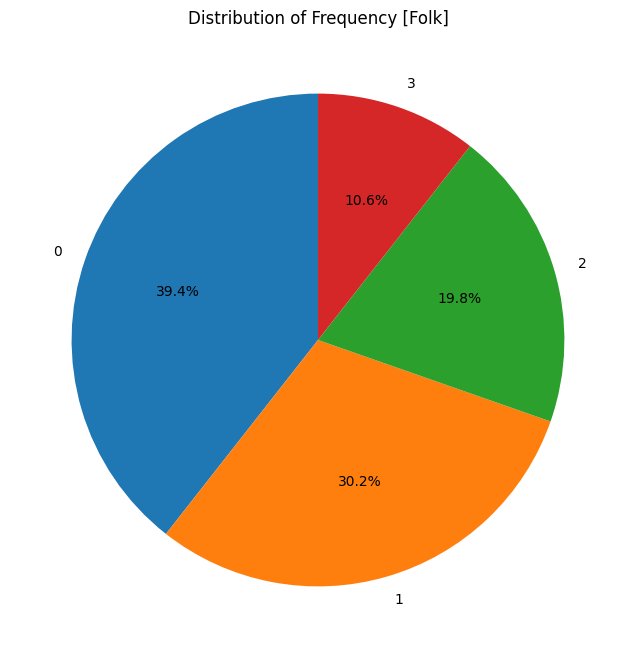

In [22]:
counts = df['Frequency [Folk]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Folk]')
plt.show()

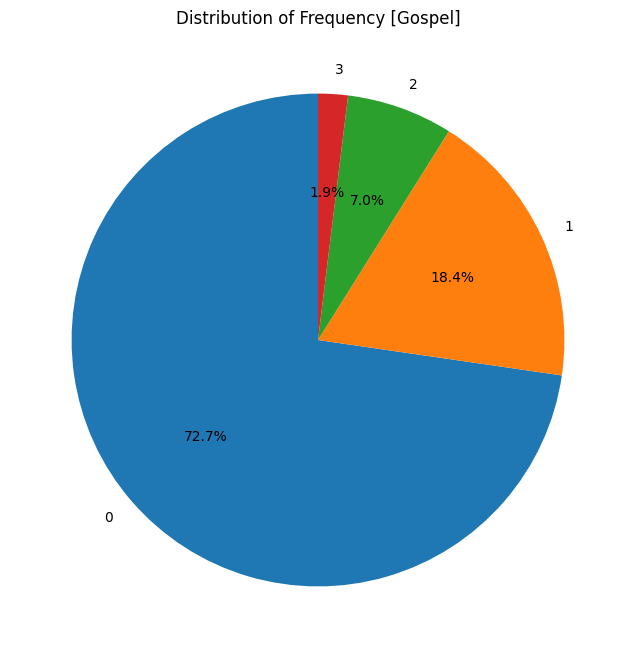

In [23]:
counts = df['Frequency [Gospel]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Gospel]')
plt.show()

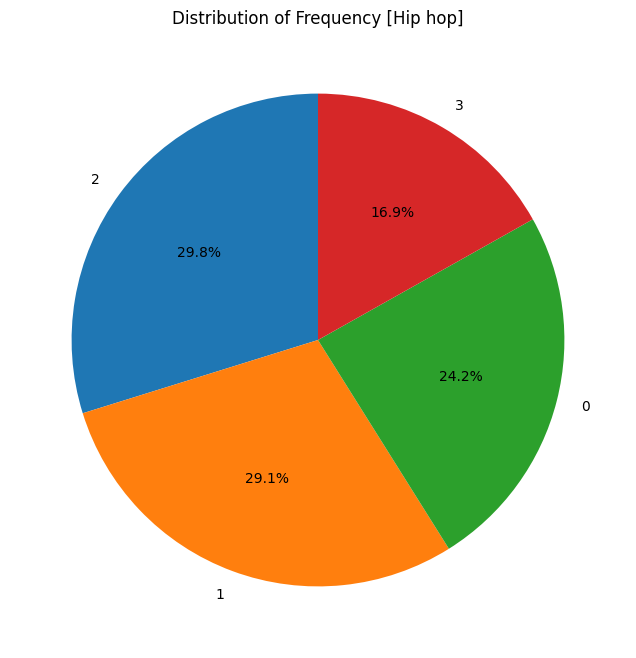

In [24]:
counts = df['Frequency [Hip hop]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Hip hop]')
plt.show()

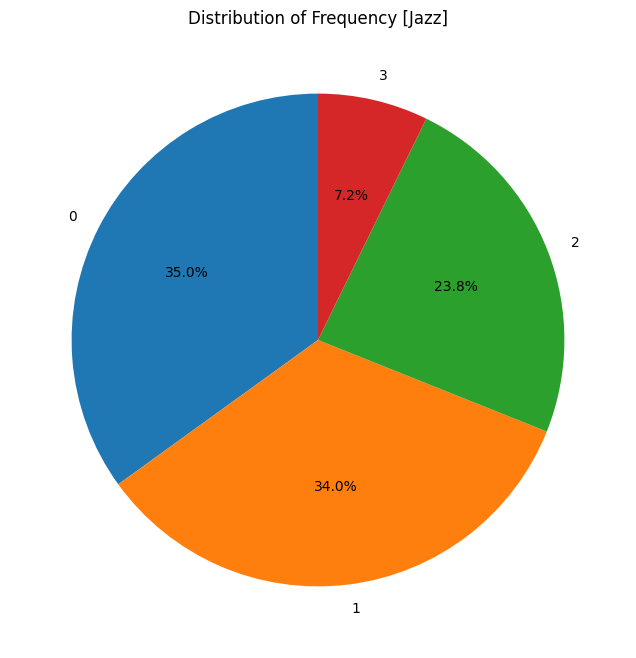

In [25]:
counts = df['Frequency [Jazz]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Jazz]')
plt.show()

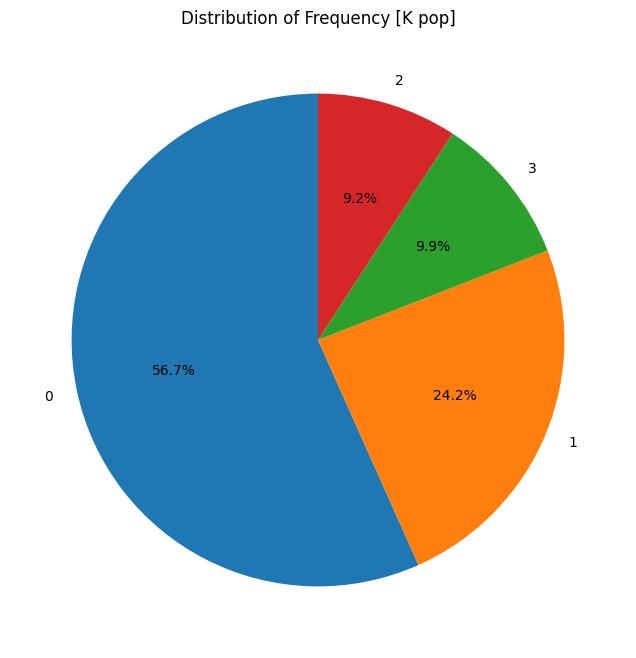

In [26]:
counts = df['Frequency [K pop]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [K pop]')
plt.show()

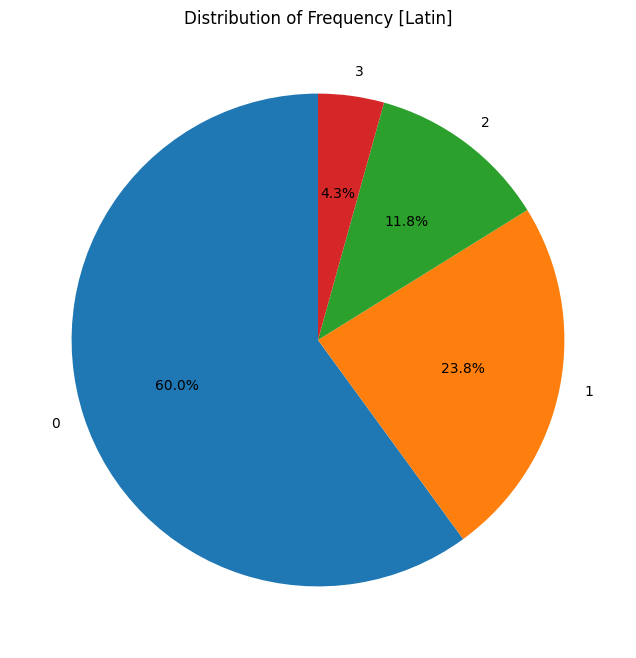

In [27]:
counts = df['Frequency [Latin]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Latin]')
plt.show()

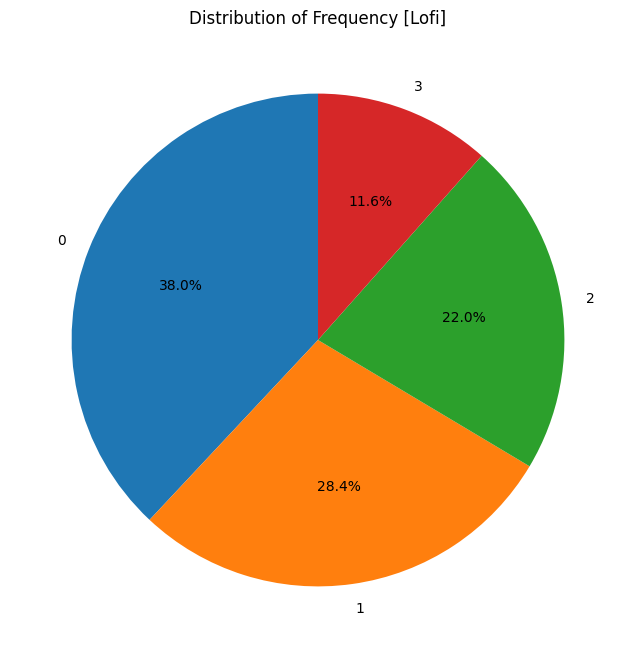

In [28]:
counts = df['Frequency [Lofi]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Lofi]')
plt.show()

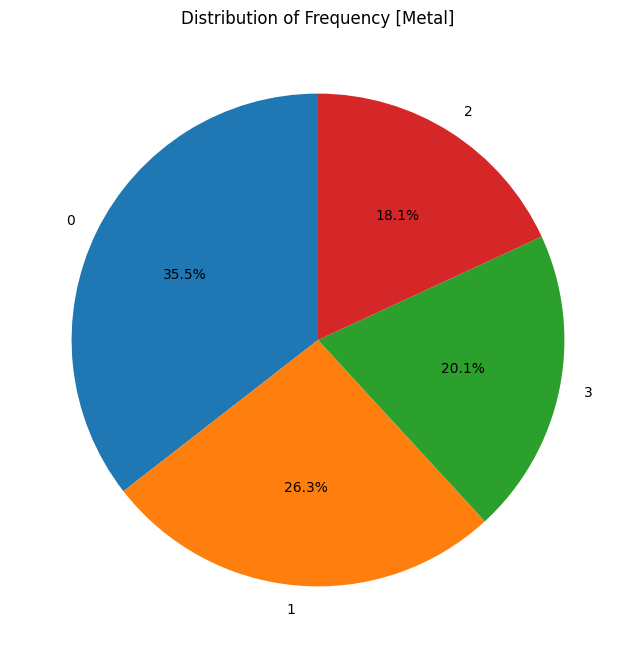

In [29]:
counts = df['Frequency [Metal]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Metal]')
plt.show()

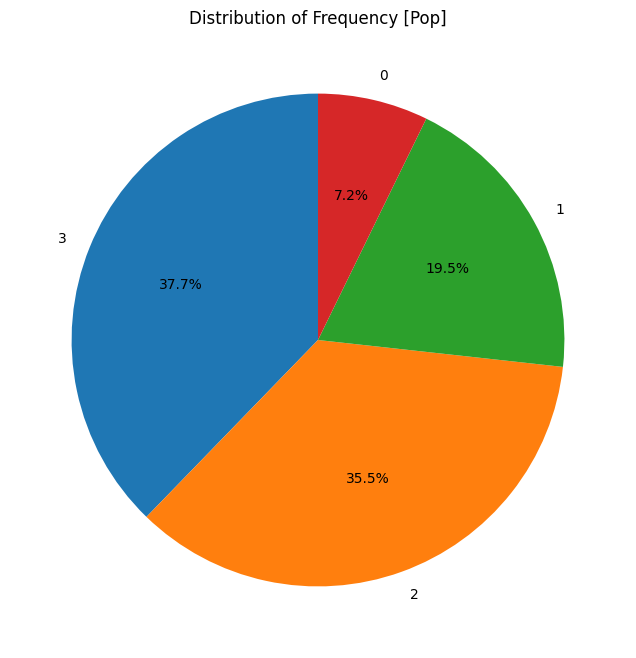

In [30]:
counts = df['Frequency [Pop]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Pop]')
plt.show()

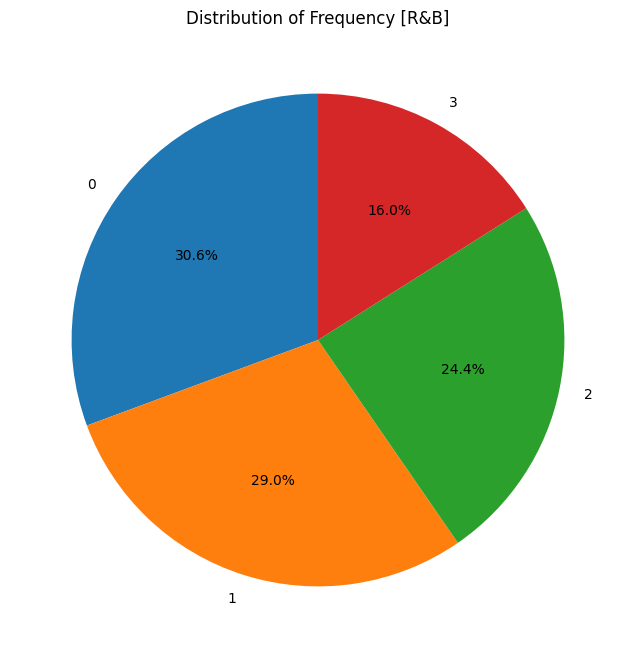

In [31]:
counts = df['Frequency [R&B]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [R&B]')
plt.show()

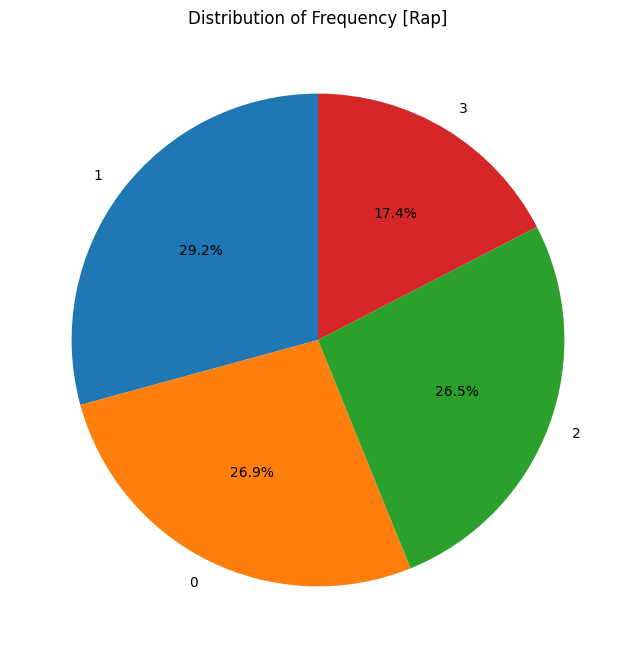

In [32]:
counts = df['Frequency [Rap]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Rap]')
plt.show()

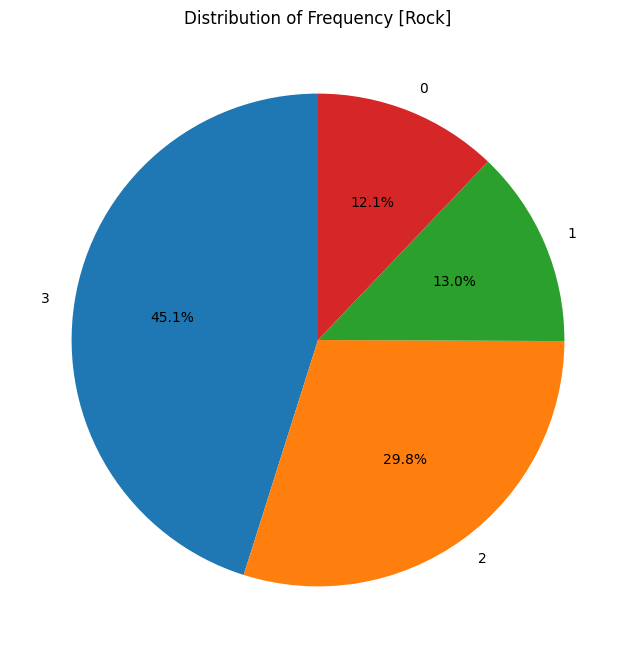

In [33]:
counts = df['Frequency [Rock]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Rock]')
plt.show()

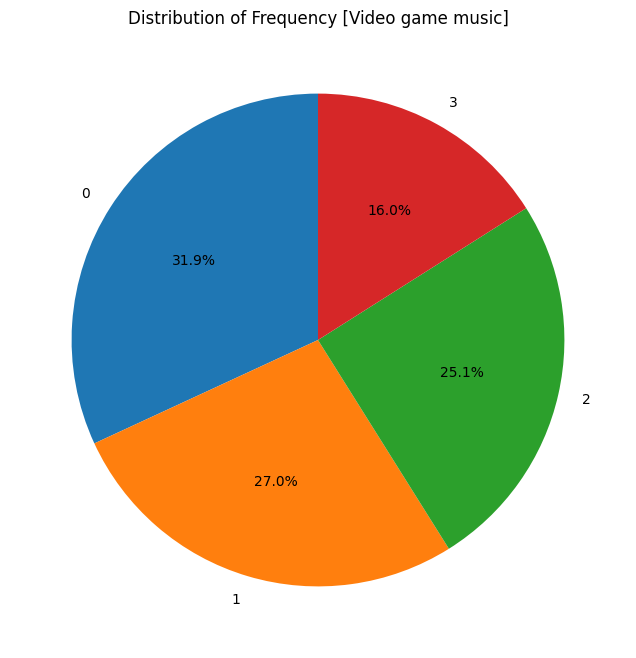

In [34]:
counts = df['Frequency [Video game music]'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Frequency [Video game music]')
plt.show()

劃一個各類別VERY FREQUENTLY的圖

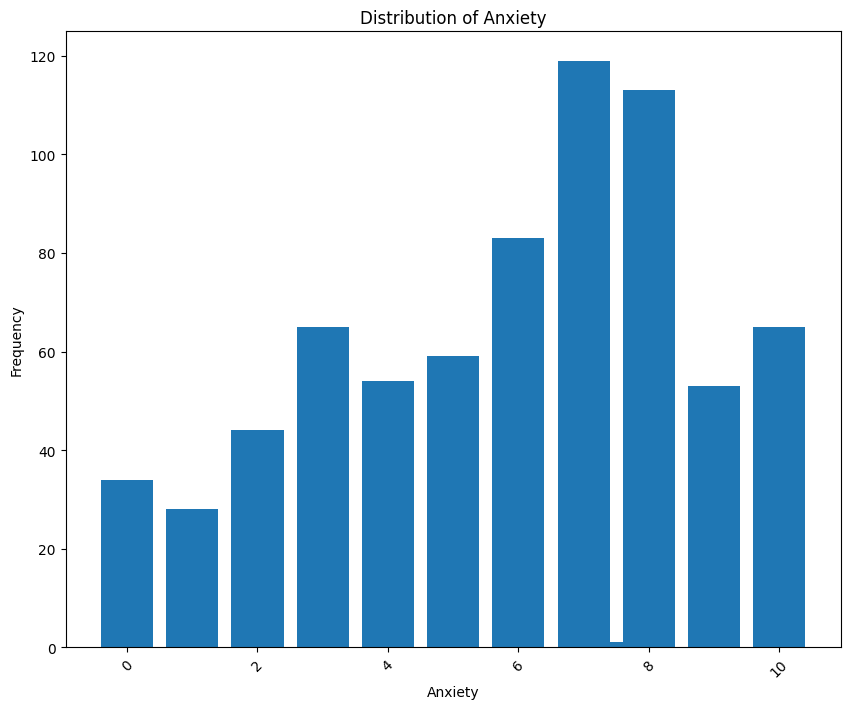

In [35]:
counts = data['Anxiety'].dropna().value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.bar(counts.index, counts.values)
plt.title('Distribution of Anxiety')
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

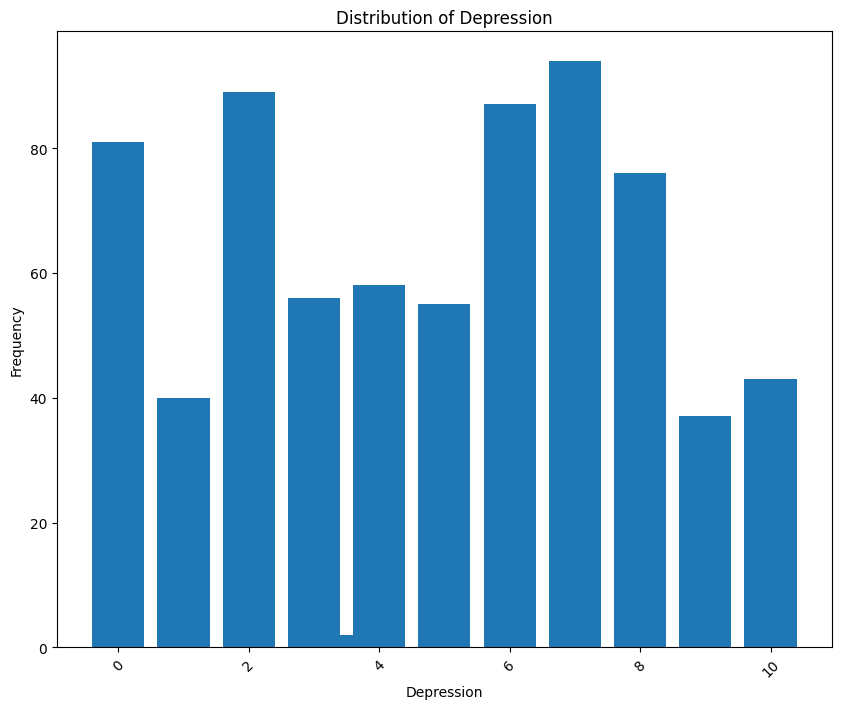

In [36]:
counts = data['Depression'].dropna().value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.bar(counts.index, counts.values)
plt.title('Distribution of Depression')
plt.xlabel('Depression')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

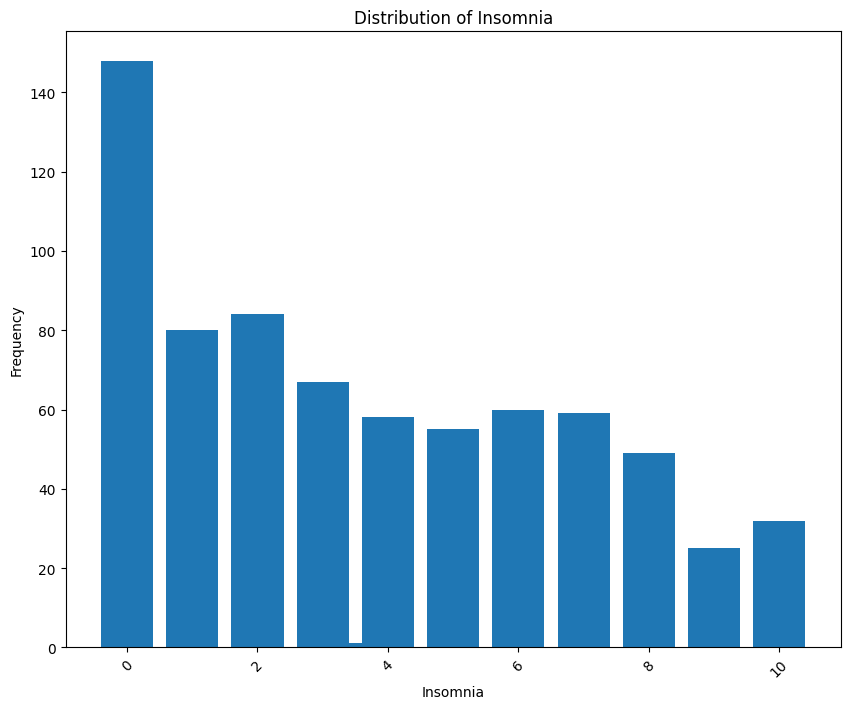

In [37]:
counts = data['Insomnia'].dropna().value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.bar(counts.index, counts.values)
plt.title('Distribution of Insomnia')
plt.xlabel('Insomnia')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

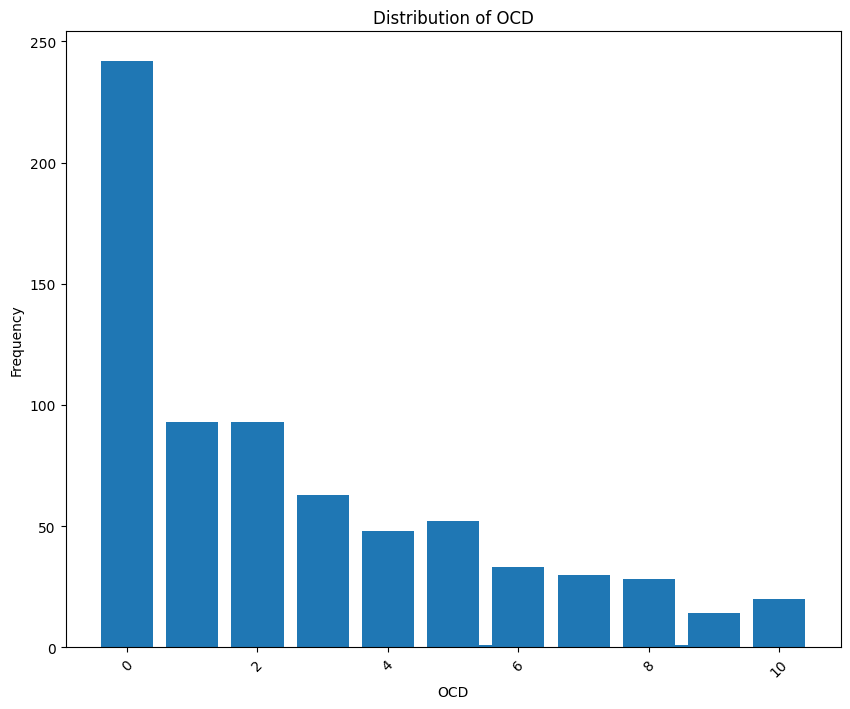

In [38]:
counts = data['OCD'].dropna().value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.bar(counts.index, counts.values)
plt.title('Distribution of OCD')
plt.xlabel('OCD')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [39]:
!pip install pandas matplotlib seaborn
import seaborn as sns

In [40]:
boxplot_data = pd.DataFrame({
    "Anxiety": data["Anxiety"],
    "Depression": data["Depression"],
    "Insomnia": data["Insomnia"],
    "OCD": data["OCD"]
})
boxplot_data

,Anxiety,Depression,Insomnia,OCD
2,7.0,7.0,10.0,2.0
3,9.0,7.0,3.0,3.0
4,7.0,2.0,5.0,9.0
5,8.0,8.0,7.0,7.0
6,4.0,8.0,6.0,0.0
...,...,...,...,...
731,7.0,6.0,0.0,9.0
732,3.0,2.0,2.0,5.0
733,2.0,2.0,2.0,2.0
734,2.0,3.0,2.0,1.0


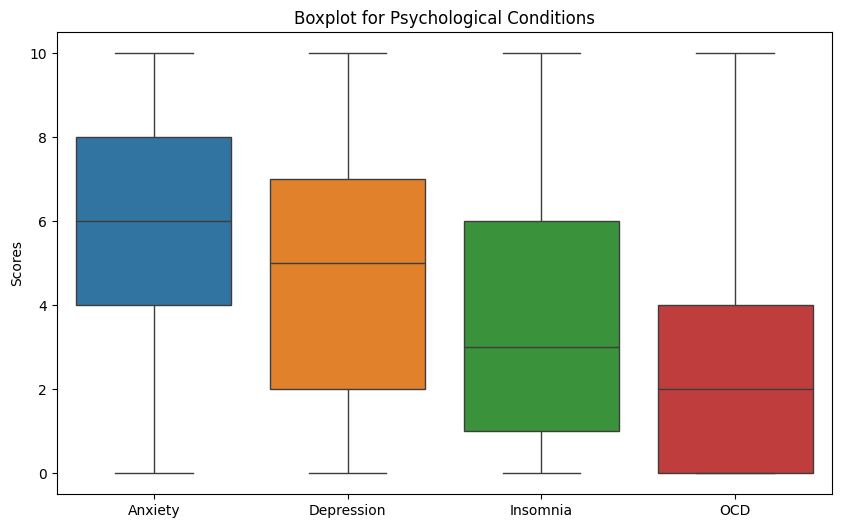

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data)
plt.title('Boxplot for Psychological Conditions')
plt.ylabel('Scores')
plt.show()

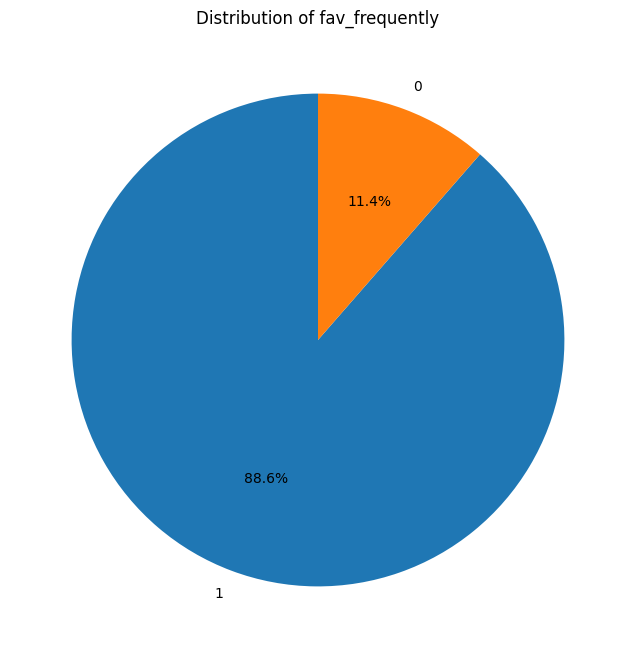

In [42]:
counts = df['fav_frequently'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of fav_frequently')
plt.show()

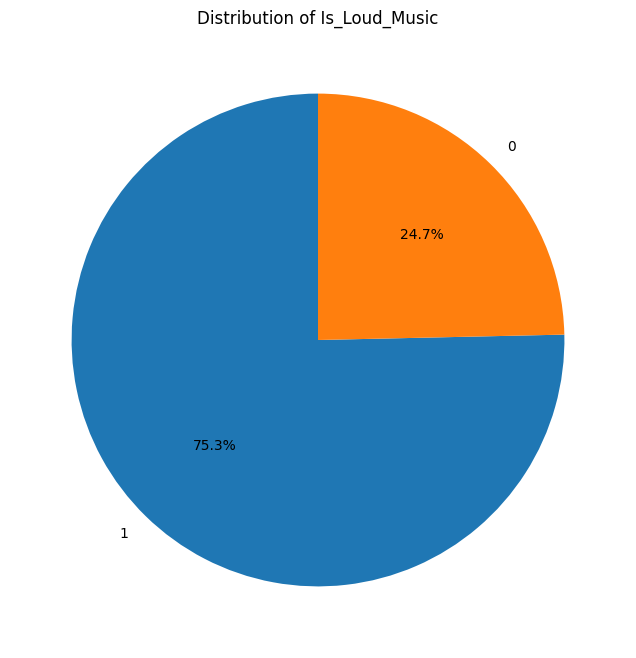

In [43]:
counts = df['Is_Loud_Music'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Is_Loud_Music')
plt.show()

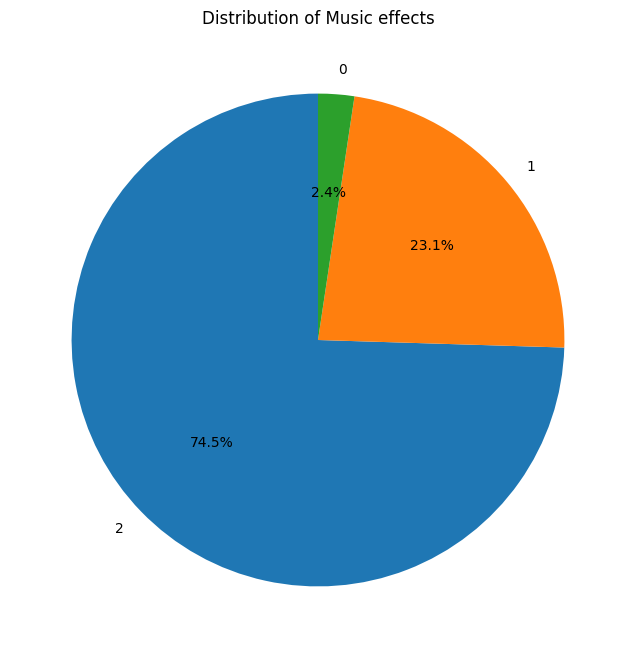

In [44]:
counts = df['Music effects'].dropna().value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music effects')
plt.show()

#Modeling (ML) / Model Comparison

## Classification

###KNN

train_test_split: test size =0.3

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new , y, test_size = 0.3, random_state = 0)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [48]:
from sklearn.metrics import accuracy_score

k-fold cross-validation: find the best k

In [49]:
# define the parameter values that should be searched
k_range = list(range (1, 31))
print (k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [50]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [51]:
#instantiate the grid
grid = GridSearchCV (knn, param_grid, cv=10, scoring='accuracy')

In [52]:
#fit the grid with data
grid.fit(X_new, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [53]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.615552,0.037812,{'n_neighbors': 1}
1,0.488791,0.059803,{'n_neighbors': 2}
2,0.664437,0.041804,{'n_neighbors': 3}
3,0.651917,0.052143,{'n_neighbors': 4}
4,0.697848,0.033429,{'n_neighbors': 5}
5,0.685348,0.054651,{'n_neighbors': 6}
6,0.714476,0.043773,{'n_neighbors': 7}
7,0.713126,0.041668,{'n_neighbors': 8}
8,0.736796,0.013991,{'n_neighbors': 9}
9,0.733998,0.025759,{'n_neighbors': 10}


In [54]:
#examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7493348982785603
{'n_neighbors': 11}


take weight options into consideration

In [55]:
k_range = list(range (1, 31))
weight_options = ['uniform','distance' ]

In [56]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict (n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [57]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')
grid.fit(X_new, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [58]:
# view the results
pd.DataFrame(grid.cv_results_) [['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.615552,0.037812,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.615552,0.037812,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.488791,0.059803,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.615552,0.037812,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.664437,0.041804,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.672790,0.042626,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.651917,0.052143,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.683901,0.047802,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.697848,0.033429,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.704793,0.032269,"{'n_neighbors': 5, 'weights': 'distance'}"


In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
k_range = list(range(1,30))
k_scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_new, y , cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
    print(k_scores)

[0.6155516431924883]
[0.6155516431924883, 0.4887910798122066]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099, 0.6519170579029734]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099, 0.6519170579029734, 0.6978482003129891]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099, 0.6519170579029734, 0.6978482003129891, 0.685348200312989]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099, 0.6519170579029734, 0.6978482003129891, 0.685348200312989, 0.7144757433489828]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099, 0.6519170579029734, 0.6978482003129891, 0.685348200312989, 0.7144757433489828, 0.7131259780907668]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099, 0.6519170579029734, 0.6978482003129891, 0.685348200312989, 0.7144757433489828, 0.7131259780907668, 0.7367957746478873]
[0.6155516431924883, 0.4887910798122066, 0.6644366197183099, 0.6519170579029734, 0.697848200312

Text(0, 0.5, 'cross validated accuracy')

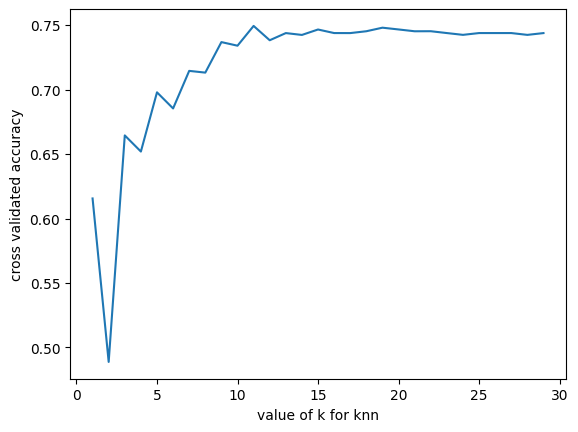

In [61]:
plt.plot(k_range, k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('cross validated accuracy')

examine the best model

In [62]:
# accuracy
print (grid.best_score_)
print(grid.best_params_)

0.7493348982785603
{'n_neighbors': 11, 'weights': 'uniform'}


In [63]:
# recall
grid_recall = GridSearchCV(knn, param_grid, cv=10, scoring ='recall_weighted')
grid_recall.fit(X_new,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall_weighted')

In [64]:
print(grid_recall.best_score_)
print(grid_recall.best_params_)

0.7493348982785603
{'n_neighbors': 11, 'weights': 'uniform'}


In [65]:
pd.DataFrame(grid_recall.cv_results_) [['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.615552,0.037812,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.615552,0.037812,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.488791,0.059803,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.615552,0.037812,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.664437,0.041804,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.672790,0.042626,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.651917,0.052143,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.683901,0.047802,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.697848,0.033429,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.704793,0.032269,"{'n_neighbors': 5, 'weights': 'distance'}"


In [66]:
# precision
grid_precision = GridSearchCV(knn, param_grid, cv=10, scoring ='precision_weighted')
grid_precision.fit(X_new,y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='precision_weighted')

In [67]:
print(grid_precision.best_score_)
print(grid_precision.best_params_)

0.6912735529431062
{'n_neighbors': 12, 'weights': 'distance'}


In [68]:
pd.DataFrame(grid_precision.cv_results_) [['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.627286,0.030072,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.627286,0.030072,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.607822,0.043842,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.627286,0.030072,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.630200,0.048918,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.629571,0.050075,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.633792,0.052551,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.632027,0.056592,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.631315,0.043234,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.634905,0.044166,"{'n_neighbors': 5, 'weights': 'distance'}"


In [69]:
# f1
grid_f1 = GridSearchCV(knn, param_grid, cv=10, scoring ='f1_weighted')
grid_f1.fit(X_new,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [70]:
print(grid_f1.best_score_)
print(grid_f1.best_params_)

0.6773880274623496
{'n_neighbors': 10, 'weights': 'distance'}


In [71]:
pd.DataFrame(grid_f1.cv_results_) [['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.620173,0.032027,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.620173,0.032027,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.527434,0.051637,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.620173,0.032027,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.642055,0.042182,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.646155,0.043514,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.642175,0.051484,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.652633,0.049798,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.653604,0.034248,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.656390,0.034171,"{'n_neighbors': 5, 'weights': 'distance'}"


In [72]:
metric =['accuracy', 'recall','precision','f1']
best_scores = [grid.best_score_, grid_recall.best_score_, grid_precision.best_score_,grid_f1.best_score_]
best_params = [grid.best_params_, grid_recall.best_params_, grid_precision.best_params_, grid_f1.best_params_]
result = pd.DataFrame({"metrics":metric, "best_score_": best_scores, "best_params_" : best_params })
result

,metrics,best_score_,best_params_
0,accuracy,0.749335,"{'n_neighbors': 11, 'weights': 'uniform'}"
1,recall,0.749335,"{'n_neighbors': 11, 'weights': 'uniform'}"
2,precision,0.691274,"{'n_neighbors': 12, 'weights': 'distance'}"
3,f1,0.677388,"{'n_neighbors': 10, 'weights': 'distance'}"


In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [74]:
knn=KNeighborsClassifier(n_neighbors=11, weights='uniform').fit(X_train,y_train)
y_pred_knn=knn.predict (X_test)
cm_knn=confusion_matrix(y_test,y_pred_knn)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')

recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print(f'recall: {recall_knn}')

precision_knn = precision_score(y_test, y_pred_knn, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_knn}')

f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print(f'F1 Score: {f1_knn}')

Accuracy: 0.7037037037037037
recall: 0.3347231612951694
Precision: 0.3474178403755868
F1 Score: 0.2859744990892532


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


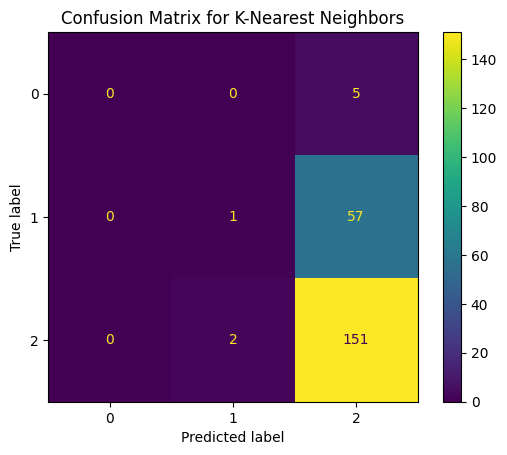

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

##Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

recall_lr = recall_score(y_test, y_pred_lr, average='macro')
print(f'recall: {recall_lr}')

precision_lr = precision_score(y_test, y_pred_lr, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_lr}')

f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f'F1 Score: {f1_lr}')

Accuracy: 0.7314814814814815
recall: 0.37634287431447677
Precision: 0.4601603017444602
F1 Score: 0.3631455399061034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


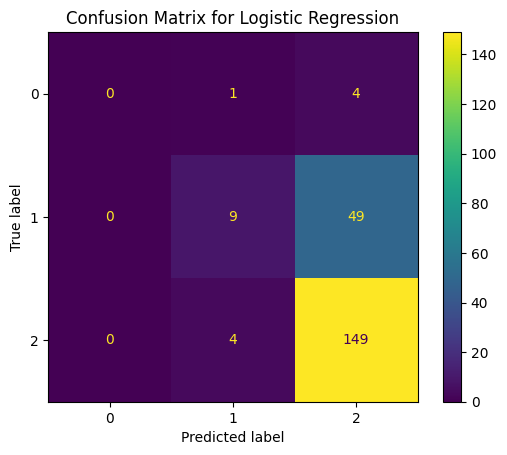

In [80]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,  display_labels=lr.classes_)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

##SVM

In [81]:
from sklearn.svm import SVC

In [82]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [83]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')

recall_svm = recall_score(y_test, y_pred_svm, average='macro')
print(f'recall: {recall_svm}')

precision_svm = precision_score(y_test, y_pred_lr, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_svm}')

f1_svm = f1_score(y_test, y_pred_lr, average='macro')
print(f'F1 Score: {f1_svm}')

Accuracy: 0.7083333333333334
recall: 0.3333333333333333
Precision: 0.4601603017444602
F1 Score: 0.3631455399061034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


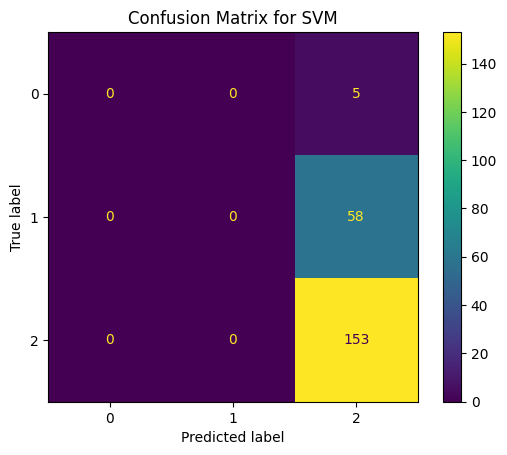

In [84]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,  display_labels=svm.classes_)
disp.plot()
plt.title('Confusion Matrix for SVM')
plt.show()

###Compare

In [85]:
model = ['KNN with best parameters', 'Logistic regression', 'SVM']
accuracy_cl = [accuracy_knn, accuracy_lr, accuracy_svm]
recall_cl = [recall_knn,recall_lr, recall_svm]
precision_cl = [precision_knn, precision_lr, precision_svm]
f1_cl = [f1_knn,f1_lr, f1_svm]

result = pd.DataFrame({"Model":model, "Accuracy": accuracy_cl, "Recall" : recall_cl, "Precision" : precision_cl, "F1" : f1_cl })
result



,Model,Accuracy,Recall,Precision,F1
0,KNN with best parameters,0.703704,0.334723,0.347418,0.285974
1,Logistic regression,0.731481,0.376343,0.460160,0.363146
2,SVM,0.708333,0.333333,0.460160,0.363146


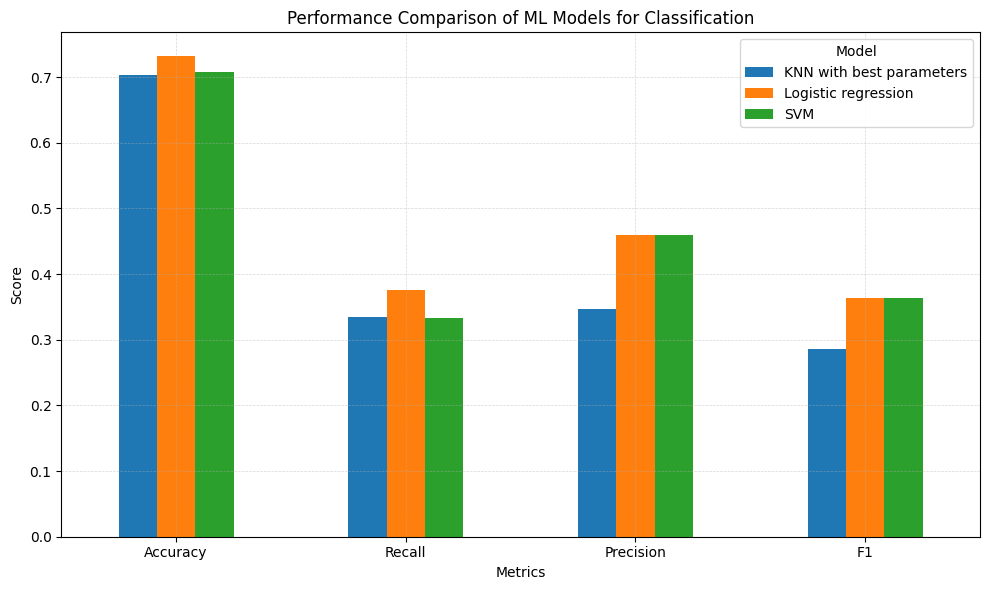

In [86]:
# Melt the DataFrame to make it suitable for grouped bar chart
result_melted = result.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# Correct usage of pivot() with keyword arguments
# First, ensure the order of metrics is as desired by sorting
result_melted['Metric'] = pd.Categorical(result_melted['Metric'], ["Accuracy", "Recall", "Precision", "F1"])
result_melted = result_melted.sort_values('Metric')
pivot_table = result_melted.pivot(index="Metric", columns="Model", values="Score")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='bar', ax=ax)

# Set titles and labels
ax.set_title('Performance Comparison of ML Models for Classification')
ax.set_ylabel('Score')
ax.set_xlabel('Metrics')
plt.xticks(rotation=0)  # Keep metric labels horizontal for clarity

# Add grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add a legend
plt.legend(title='Model')

# Show plot
plt.tight_layout()
plt.show()

##Regression: predicting a value

##Lasso Regression

1.Lasso stands for Least Absolute Shrinkage and Selection Operator.

2.It's a type of linear regression that can also do feature selection.

3.Lasso can help you figure out which features in data are the most important.

4.Lasso fits a model to your data, but it also adds a penalty for having too many variables.

5.The penalty can shrink the less important feature's impact down to zero, effectively removing them from the model.

6.It's useful when you have lots of features and you're not sure which ones are important. Lasso can help simplify your model by picking only the most important features.

In [87]:
from sklearn.linear_model import Lasso

In [88]:
lasso =Lasso()

In [89]:
# fit the model to the training data
lasso.fit(X_train,y_train)
# make predictions on the testing set
y_pred_la = lasso.predict(X_test)

In [90]:
#RSME
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_la)))

0.5144831274907562


In [91]:
#mse
print(metrics.mean_squared_error(y_test,y_pred_la))

0.26469288847266975


In [92]:
#R2
print(metrics.r2_score(y_test,y_pred_la))

-0.010267621448043274


In [93]:
#MAE
print(metrics.mean_absolute_error(y_test,y_pred_la))

0.42437656780286254


In [94]:
print(lasso.intercept_)
print(lasso.coef_)
print(type(lasso.intercept_))
print(type(lasso.coef_))

1.7370517928286853
[-0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.
  0.  0.  0. -0. -0.  0. -0. -0.  0.  0. -0.]
<class 'numpy.float64'>
<class 'numpy.ndarray'>


In [95]:
features_Xs = X.columns
features_Xs

Index(['Age', 'Hours per day', 'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'fav_frequently',
       'Is_Loud_Music'],
      dtype='object')

In [96]:
df_lasso = pd.DataFrame({"Feature":features_Xs,"Coefficient":lasso.coef_})
df_lasso

,Feature,Coefficient
0,Age,-0.0
1,Hours per day,0.0
2,While working,0.0
3,Instrumentalist,0.0
4,Composer,0.0
5,Exploratory,0.0
6,Foreign languages,0.0
7,Frequency [Classical],-0.0
8,Frequency [Country],0.0
9,Frequency [EDM],0.0


##Regression: predicting a value

###Regularzation with Linear Regression

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [98]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso',Lasso()),
])

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge',Ridge()),
])

elastic_net_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_net', ElasticNet()),
])

In [99]:
lasso_params ={'lasso__alpha':[0.01, 0.1, 1, 10, 100]}
ridge_params ={'ridge__alpha':[0.01, 0.1, 1, 10, 100]}
elastic_net_params ={'elastic_net__alpha':[0.01, 0.1, 1, 10, 100],'elastic_net__l1_ratio':[0.2,0.5,0.8]}

In [100]:
lasso_grid =  GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring="neg_mean_squared_error" )
ridge_grid =  GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring="neg_mean_squared_error" )
elastic_net_grid =  GridSearchCV(elastic_net_pipeline, elastic_net_params, cv=5, scoring="neg_mean_squared_error" )

In [101]:
lasso_grid.fit(X_train,y_train)
ridge_grid.fit(X_train,y_train)
elastic_net_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic_net', ElasticNet())]),
             param_grid={'elastic_net__alpha': [0.01, 0.1, 1, 10, 100],
                         'elastic_net__l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error')

In [102]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE:{mse}")
    print(f"{name} Best Params:{model.best_params_}")

evaluate_model(lasso_grid, X_test, y_test, 'Lasso')
evaluate_model(ridge_grid, X_test, y_test, 'Ridge')
evaluate_model(elastic_net_grid, X_test, y_test, 'ElasticNet')

Lasso Test MSE:0.25375778897560647
Lasso Best Params:{'lasso__alpha': 0.01}
Ridge Test MSE:0.25675606083125085
Ridge Best Params:{'ridge__alpha': 100}
ElasticNet Test MSE:0.25330725787892194
ElasticNet Best Params:{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.2}


####Lasso

In [103]:
best_lasso = lasso_grid.best_estimator_
# 獲取 pipeline 中的 Lasso 模型
lasso_model = best_lasso.named_steps['lasso']

# 現在你可以訪問截距和係數
print(lasso_model.intercept_)
print(lasso_model.coef_)


1.7370517928286853
[-0.00363599  0.          0.0585441   0.02290401  0.0094589   0.03607018
  0.         -0.01197632  0.04166664  0.          0.          0.02865021
 -0.01420375 -0.          0.         -0.         -0.         -0.01215612
 -0.00418621  0.03385113 -0.         -0.00257852 -0.          0.05416886
 -0.05564771 -0.01666369 -0.          0.00691605 -0.        ]


In [104]:
y_pred_best_la = best_lasso.predict(X_test)
print("best lasso rmse", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_la)))
print("best lasso mse",metrics.mean_squared_error(y_test,y_pred_best_la))
print("best lasso r2",metrics.r2_score(y_test,y_pred_best_la))
print("best lasso mae",metrics.mean_absolute_error(y_test,y_pred_best_la))

best lasso rmse 0.5037437731382954
best lasso mse 0.25375778897560647
best lasso r2 0.03146896249624542
best lasso mae 0.4064987254652554


####Ridge

In [105]:
best_ridge = ridge_grid.best_estimator_
# 獲取 pipeline 中的 rigde 模型
ridge_model = best_ridge.named_steps['ridge']

# 現在你可以訪問截距和係數
print(ridge_model.intercept_)
print(ridge_model.coef_)


1.7370517928286853
[-0.01510382  0.00058481  0.05672404  0.02646085  0.01522032  0.04100363
  0.00267411 -0.01871245  0.04364141  0.01197956  0.00418154  0.03476148
 -0.02206856 -0.00795735  0.00345616 -0.00276818 -0.00388504 -0.01629258
 -0.01506117  0.04527861 -0.00789658 -0.01100089 -0.00925546  0.05364861
 -0.05117499 -0.02120249 -0.00755713  0.01504066 -0.00210198]


In [106]:
y_pred_best_ri = best_ridge.predict(X_test)
print("best ridge rmse", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_ri)))
print("best ridge mse",metrics.mean_squared_error(y_test,y_pred_best_ri))
print("best ridge r2",metrics.r2_score(y_test,y_pred_best_ri))
print("best ridge mae",metrics.mean_absolute_error(y_test,y_pred_best_ri))

best ridge rmse 0.5067110230015238
best ridge mse 0.25675606083125085
best ridge r2 0.02002529661789587
best ridge mae 0.4084136733729818


####Elastic net

In [107]:
best_elastic_net = elastic_net_grid.best_estimator_
# 獲取 pipeline 中的 Lasso 模型
elastic_net_model = best_elastic_net.named_steps['elastic_net']

# 現在你可以訪問截距和係數
print(elastic_net_model.intercept_)
print(elastic_net_model.coef_)

1.7370517928286853
[-0.          0.          0.04746463  0.01454638  0.00300285  0.02215771
  0.         -0.          0.03147131  0.          0.          0.01933064
 -0.         -0.          0.          0.         -0.         -0.00379635
 -0.          0.01819283 -0.         -0.         -0.          0.03133541
 -0.03571391 -0.00757408 -0.          0.         -0.        ]


In [108]:
y_pred_best_en = best_elastic_net.predict(X_test)
print("best elastic_net rmse", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_en)))
print("best elastic_net mse",metrics.mean_squared_error(y_test,y_pred_best_en))
print("best elastic_net r2",metrics.r2_score(y_test,y_pred_best_en))
print("best elastic_net mae",metrics.mean_absolute_error(y_test,y_pred_best_en))

best elastic_net rmse 0.5032963916808086
best elastic_net mse 0.25330725787892194
best elastic_net r2 0.033188528828617225
best elastic_net mae 0.41015424618171137


#ML Model Adjustments

## Find important variables

###Univariate Selection - Select K Best
SelectKBest helps to improve model performance by reducing the feature dimensionality
SelectKBest focuse on the most relevant features, and potentially reducing overfitting
choose k, the number of top features to select, and the statistical test to use
After fitting SelectKBest to your data, it will reduce the feature set accordingly
The Chi-squared (χ²) test, often used in feature selection with the SelectKBest method
(χ²) test is a statistical test that measures the lack of independence between two variables

In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [110]:
ordered_rank_features = SelectKBest(score_func=chi2, k=8)
ordered_feature = ordered_rank_features.fit(X_new,y)

In [111]:
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.101266,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,1.0,1.0
1,0.645570,2.5,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,...,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,1.0,0.0
2,0.101266,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,1.0,0.0
3,0.101266,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,3.0,3.0,3.0,0.0,8.0,8.0,7.0,7.0,1.0,0.0
4,0.101266,3.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,...,1.0,0.0,0.0,2.0,4.0,8.0,6.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.088608,2.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,...,0.0,1.0,3.0,0.0,7.0,6.0,0.0,9.0,1.0,1.0
714,0.101266,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,2.0,2.0,3.0,2.0,2.0,5.0,1.0,1.0
715,0.113924,6.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0
716,0.113924,5.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0


In [112]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
dfcolunms = pd.DataFrame(X.columns)
feature_rank = pd.concat([df_scores, dfcolunms], axis=1)
feature_rank.columns = ["Score", "Features"]
feature_rank.sort_values(by="Score", ascending=False)

,Score,Features
24,24.675188,Depression
23,21.817676,Anxiety
19,9.541262,Frequency [R&B]
11,7.631780,Frequency [Gospel]
26,5.747301,OCD
3,5.429344,Instrumentalist
4,4.776192,Composer
2,4.716333,While working
5,4.524447,Exploratory
12,4.400080,Frequency [Hip hop]


###Feature Importance - Extra Tree
Like Random Forests, Extra Trees builds numerous decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. Extra Trees introduces more randomness compared to Random Forests When splitting a node, it chooses the best split among a random subset of features Extra Tree also randomly splits the node, rather than finding the best possible threshold like a Random Forest does This added randomness helps to control overfitting. It makes the model more robust to noise in the data Extra Trees can capture complex, non-linear relationships between features, making it a robust method for feature selection It introduces randomness when splitting a node. It selects a random subset of features at each split, which helps in providing a diverse set of feature importance measures, aiding in identifying a wider range of important features It ranks features based on how effectively they reduce impurity in the nodes of the trees

In [113]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.04787041 0.0419249  0.03105928 0.02152298 0.01475176 0.02542861
 0.02534263 0.03483815 0.03359799 0.03431209 0.03622654 0.0258756
 0.03643982 0.03578869 0.03106135 0.03331081 0.03557698 0.03684021
 0.0355524  0.03774384 0.03616751 0.0346888  0.04075771 0.05328268
 0.05037001 0.04960386 0.04190421 0.01807091 0.02008924]


<function matplotlib.pyplot.show(close=None, block=None)>

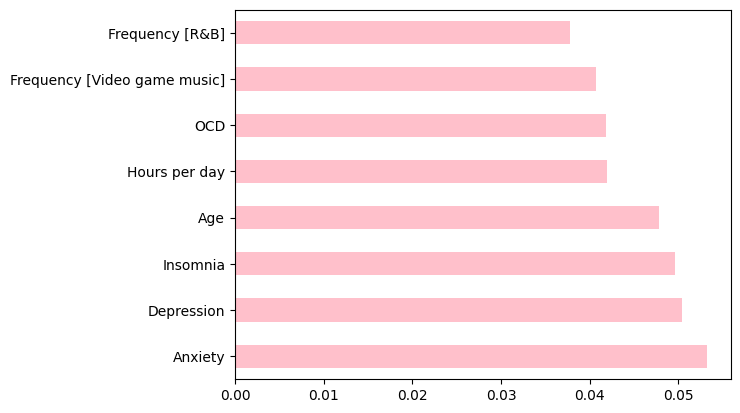

In [114]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)
ranked_features.nlargest(8).plot(kind='barh', color='pink')
plt.show

# Information Gain
It measures the reduction in entropy about a dataset after it has been split on an attribute
Information gain is used to quantify how much a feature helps us to "gain information" about the class
Information Gain=Entropy (original data)−Weighted Entropy (after split)

In [115]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_data = pd.Series(mutual_info, index = X.columns)
mutual_data. sort_values(ascending = False)

Hours per day                   0.035332
Age                             0.034790
Anxiety                         0.029519
Frequency [R&B]                 0.022532
Frequency [K pop]               0.020978
Frequency [Video game music]    0.017922
Depression                      0.017722
Exploratory                     0.016932
Frequency [Metal]               0.015212
Frequency [Gospel]              0.014381
fav_frequently                  0.013944
Instrumentalist                 0.010752
Is_Loud_Music                   0.008022
Foreign languages               0.007829
While working                   0.007291
Frequency [Latin]               0.007246
Frequency [EDM]                 0.005997
Composer                        0.004041
Frequency [Classical]           0.003968
Frequency [Jazz]                0.003532
Frequency [Rap]                 0.001563
Frequency [Pop]                 0.000378
Frequency [Lofi]                0.000000
Frequency [Folk]                0.000000
Frequency [Rock]

##PCA

In [116]:
from sklearn.decomposition import PCA

In [117]:
X_scaled = StandardScaler().fit_transform(X_new)

In [118]:
pca = PCA(n_components = None)
pca.fit_transform(X_scaled)
evr = pca.explained_variance_ratio_*100
cum_evr = np.cumsum(evr)
print(cum_evr)

[ 12.99800449  21.64362524  29.39367703  35.63965017  41.23889099
  45.83699491  50.14868459  54.23793981  57.94447293  61.34351513
  64.6046584   67.82664005  70.58735268  73.22726722  75.82410177
  78.30333331  80.71251189  82.97958598  85.13572618  87.08239303
  88.89363207  90.65955851  92.29799644  93.84231591  95.37978352
  96.7670666   98.06462778  99.32639748 100.        ]


In [119]:
X_new.shape

(718, 29)

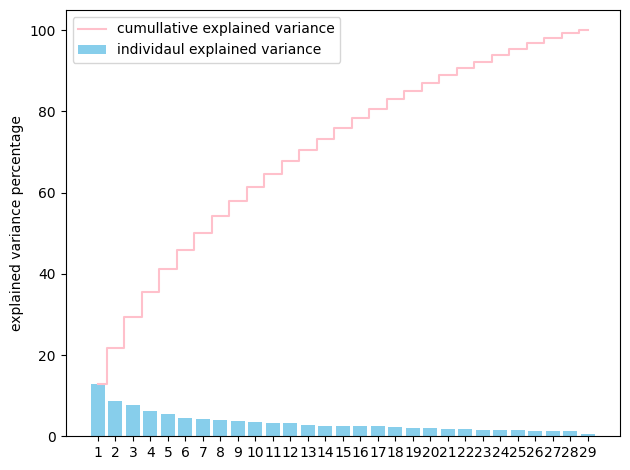

In [120]:
plt.bar(range(1,30), evr, align='center', label='individaul explained variance', color ='skyblue')
plt.step(range(1,30), cum_evr, where='mid', label='cumullative explained variance', color ='pink')
plt.ylabel('explained variance percentage')
plt.xticks(ticks=list(range(1,30)))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [121]:
pca = PCA(n_components = 22) #超過90%
X_pca = pca.fit_transform(X_scaled)
evr = pca.explained_variance_ratio_*100
cum_evr = np.cumsum(evr)
print(cum_evr)

[12.99800449 21.64362524 29.39367703 35.63965017 41.23889099 45.83699491
 50.14868459 54.23793981 57.94447293 61.34351513 64.6046584  67.82664005
 70.58735268 73.22726722 75.82410177 78.30333331 80.71251189 82.97958598
 85.13572618 87.08239303 88.89363207 90.65955851]


###PCA & Classification

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca , y, test_size = 0.3, random_state = 0)

In [123]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

k-fold cross-validation: find the best k

In [124]:
# define the parameter values that should be searched
k_range = list(range (1, 31))
print (k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [125]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [126]:
#instantiate the grid
grid = GridSearchCV (knn, param_grid, cv=10, scoring='accuracy')

In [127]:
#fit the grid with data
grid.fit(X_pca, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [128]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.647594,0.031487,{'n_neighbors': 1}
1,0.562578,0.030696,{'n_neighbors': 2}
2,0.683881,0.039967,{'n_neighbors': 3}
3,0.651878,0.044315,{'n_neighbors': 4}
4,0.706142,0.039371,{'n_neighbors': 5}
5,0.694992,0.042738,{'n_neighbors': 6}
6,0.722848,0.027326,{'n_neighbors': 7}
7,0.706182,0.027526,{'n_neighbors': 8}
8,0.718682,0.022807,{'n_neighbors': 9}
9,0.718701,0.019879,{'n_neighbors': 10}


In [129]:
#examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7465571205007825
{'n_neighbors': 28}


take weight options into consideration

In [130]:
k_range = list(range (1, 31))
weight_options = ['uniform','distance' ]

In [131]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict (n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [132]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'accuracy')
grid.fit(X_pca, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [133]:
# view the results
pd.DataFrame(grid.cv_results_) [['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.647594,0.031487,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.647594,0.031487,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.562578,0.030696,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.647594,0.031487,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.683881,0.039967,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.689456,0.039955,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.651878,0.044315,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.700587,0.042467,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.706142,0.039371,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.711698,0.037786,"{'n_neighbors': 5, 'weights': 'distance'}"


In [134]:
k_range = list(range(1,30))
k_scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_pca, y , cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
    print(k_scores)

[0.6475938967136151]
[0.6475938967136151, 0.5625782472613459]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543, 0.6518779342723005]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543, 0.6518779342723005, 0.7061424100156495]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543, 0.6518779342723005, 0.7061424100156495, 0.6949921752738655]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543, 0.6518779342723005, 0.7061424100156495, 0.6949921752738655, 0.722848200312989]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543, 0.6518779342723005, 0.7061424100156495, 0.6949921752738655, 0.722848200312989, 0.7061815336463224]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543, 0.6518779342723005, 0.7061424100156495, 0.6949921752738655, 0.722848200312989, 0.7061815336463224, 0.7186815336463225]
[0.6475938967136151, 0.5625782472613459, 0.6838810641627543, 0.6518779342723005, 0.70614241001

Text(0, 0.5, 'cross validated accuracy')

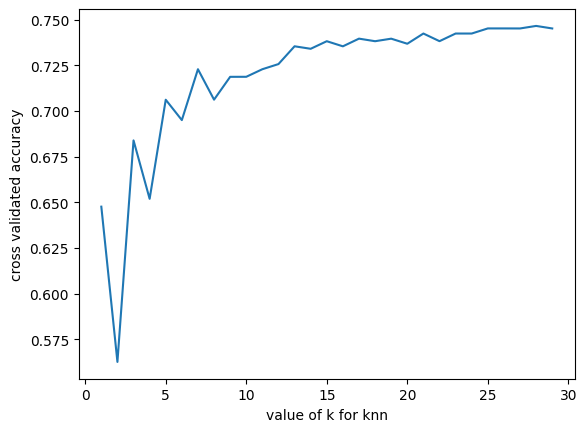

In [135]:
plt.plot(k_range, k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('cross validated accuracy')

examine the best model

In [136]:
# accuracy
print (grid.best_score_)
print(grid.best_params_)

0.7465571205007825
{'n_neighbors': 28, 'weights': 'uniform'}


In [137]:
# recall
grid_recall = GridSearchCV(knn, param_grid, cv=10, scoring ='recall_weighted')
grid_recall.fit(X_pca,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall_weighted')

In [138]:
print(grid_recall.best_score_)
print(grid_recall.best_params_)

0.7465571205007825
{'n_neighbors': 28, 'weights': 'uniform'}


In [139]:
# precision
grid_precision = GridSearchCV(knn, param_grid, cv=10, scoring ='precision_weighted')
grid_precision.fit(X_pca,y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='precision_weighted')

In [140]:
print(grid_precision.best_score_)
print(grid_precision.best_params_)

0.661912482161743
{'n_neighbors': 7, 'weights': 'distance'}


In [141]:
pd.DataFrame(grid_precision.cv_results_) [['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.631136,0.041965,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.631136,0.041965,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.651222,0.036962,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.631136,0.041965,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.632414,0.044447,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.630643,0.047775,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.621921,0.045188,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.633928,0.045414,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.643222,0.070447,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.648565,0.069530,"{'n_neighbors': 5, 'weights': 'distance'}"


In [142]:
# f1
grid_f1 = GridSearchCV(knn, param_grid, cv=10, scoring ='f1_weighted')
grid_f1.fit(X_pca,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [143]:
print(grid_f1.best_score_)
print(grid_f1.best_params_)

0.6584822194220712
{'n_neighbors': 6, 'weights': 'distance'}


In [144]:
pd.DataFrame(grid_f1.cv_results_) [['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.637967,0.035487,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.637967,0.035487,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.594229,0.029447,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.637967,0.035487,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.645803,0.036019,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.647984,0.037200,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.633971,0.041245,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.653498,0.038079,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.652097,0.038051,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.654075,0.035377,"{'n_neighbors': 5, 'weights': 'distance'}"


In [145]:
metric =['accuracy', 'recall','precision','f1']
best_scores = [grid.best_score_, grid_recall.best_score_, grid_precision.best_score_,grid_f1.best_score_]
best_params = [grid.best_params_, grid_recall.best_params_, grid_precision.best_params_, grid_f1.best_params_]
result = pd.DataFrame({"metrics":metric, "best_score_": best_scores, "best_params_" : best_params })
result

,metrics,best_score_,best_params_
0,accuracy,0.746557,"{'n_neighbors': 28, 'weights': 'uniform'}"
1,recall,0.746557,"{'n_neighbors': 28, 'weights': 'uniform'}"
2,precision,0.661912,"{'n_neighbors': 7, 'weights': 'distance'}"
3,f1,0.658482,"{'n_neighbors': 6, 'weights': 'distance'}"


In [146]:
knn=KNeighborsClassifier(n_neighbors=28, weights='uniform').fit(X_train,y_train)
y_pred_knn=knn.predict (X_test)
cm_knn=confusion_matrix(y_test,y_pred_knn)

In [147]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')

recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print(f'recall: {recall_knn}')

precision_knn = precision_score(y_test, y_pred_knn, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_knn}')

f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print(f'F1 Score: {f1_knn}')

Accuracy: 0.7083333333333334
recall: 0.3333333333333333
Precision: 0.23611111111111113
F1 Score: 0.2764227642276423


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


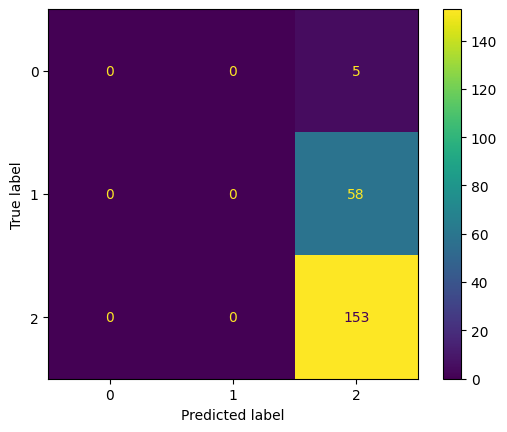

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot ()

##Logistic Regression

In [149]:
lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

precision_lr = precision_score(y_test, y_pred_lr, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_lr}')

f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f'F1 Score: {f1_lr}')

Accuracy: 0.7268518518518519
Precision: 0.4454394693200663
F1 Score: 0.36091117818538304


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


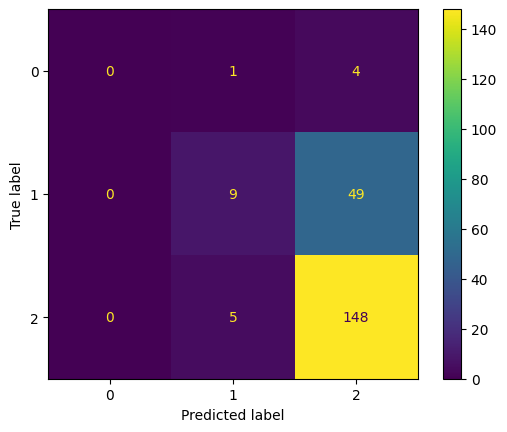

In [151]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,  display_labels=lr.classes_)
disp.plot()

##SVM

In [152]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [153]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')

precision_svm = precision_score(y_test, y_pred_lr, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_svm}')

f1_svm = f1_score(y_test, y_pred_lr, average='macro')
print(f'F1 Score: {f1_svm}')

Accuracy: 0.7083333333333334
Precision: 0.4454394693200663
F1 Score: 0.36091117818538304


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


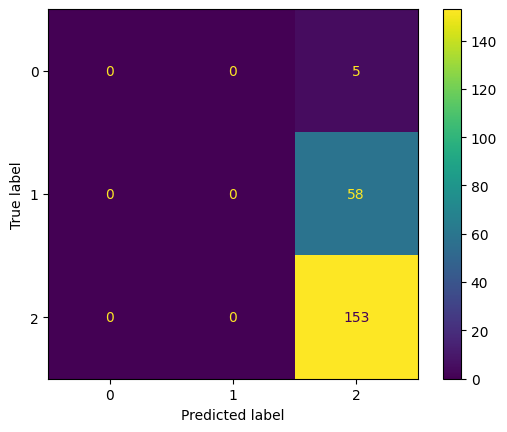

In [154]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,  display_labels=lr.classes_)
disp.plot()

COMPARE


In [155]:
accuracy_knn_df = pd.DataFrame(grid.cv_results_)
recall_knn_df = pd.DataFrame(grid_recall.cv_results_)
precision_knn_df = pd.DataFrame(grid_precision.cv_results_)
f1_knn_df = pd.DataFrame(grid_f1.cv_results_)
accuracy_knn = accuracy_knn_df[['mean_test_score']].iloc[20].values[0]
recall_knn = recall_knn_df[['mean_test_score']].iloc[20].values[0]
precision_knn = precision_knn_df[['mean_test_score']].iloc[20].values[0]
f1_knn = f1_knn_df[['mean_test_score']].iloc[20].values[0]


In [156]:
metric =['Model','accuracy','recall','precision','f1']
model = ['KNN with best parameters', 'Logistic regression', 'SVM']
accuracy_cl = [accuracy_knn, accuracy_lr, accuracy_svm]
recall_cl = [recall_knn,recall_lr, recall_svm]
precision_cl = [precision_knn, precision_lr, precision_svm]
f1_cl = [f1_knn,f1_lr, f1_svm]

result = pd.DataFrame({"model":model, "Accuracy": accuracy_cl, "Recall" : recall_cl, "Precision" : precision_cl, "F1" : f1_cl })
result



,model,Accuracy,Recall,Precision,F1
0,KNN with best parameters,0.722848,0.722848,0.593417,0.635884
1,Logistic regression,0.726852,0.376343,0.445439,0.360911
2,SVM,0.708333,0.333333,0.445439,0.360911


##Regression: predicting a value

In [157]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso',Lasso()),
])

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge',Ridge()),
])

elastic_net_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_net', ElasticNet()),
])

In [158]:
lasso_params ={'lasso__alpha':[0.01, 0.1, 1, 10, 100]}
ridge_params ={'ridge__alpha':[0.01, 0.1, 1, 10, 100]}
elastic_net_params ={'elastic_net__alpha':[0.01, 0.1, 1, 10, 100],'elastic_net__l1_ratio':[0.2,0.5,0.8]}

In [159]:
lasso_grid =  GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring="neg_mean_squared_error" )
ridge_grid =  GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring="neg_mean_squared_error" )
elastic_net_grid =  GridSearchCV(elastic_net_pipeline, elastic_net_params, cv=5, scoring="neg_mean_squared_error" )

In [160]:
lasso_grid.fit(X_train,y_train)
ridge_grid.fit(X_train,y_train)
elastic_net_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic_net', ElasticNet())]),
             param_grid={'elastic_net__alpha': [0.01, 0.1, 1, 10, 100],
                         'elastic_net__l1_ratio': [0.2, 0.5, 0.8]},
             scoring='neg_mean_squared_error')

In [161]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE:{mse}")
    print(f"{name} Best Params:{model.best_params_}")

evaluate_model(lasso_grid, X_test, y_test, 'Lasso')
evaluate_model(ridge_grid, X_test, y_test, 'Ridge')
evaluate_model(elastic_net_grid, X_test, y_test, 'ElasticNet')

Lasso Test MSE:0.2555380432225427
Lasso Best Params:{'lasso__alpha': 0.01}
Ridge Test MSE:0.25494323195980334
Ridge Best Params:{'ridge__alpha': 100}
ElasticNet Test MSE:0.25725505934670956
ElasticNet Best Params:{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.2}


####Lasso

In [162]:
best_lasso = lasso_grid.best_estimator_
# 獲取 pipeline 中的 Lasso 模型
lasso_model = best_lasso.named_steps['lasso']

# 現在你可以訪問截距和係數
print(lasso_model.intercept_)
print(lasso_model.coef_)


1.7370517928286853
[ 0.03613664  0.01435258  0.03530261  0.         -0.          0.00273557
  0.          0.06348049  0.04796853 -0.         -0.00796573 -0.01512285
  0.01208088 -0.00931071 -0.         -0.01228197 -0.03549428 -0.00351981
 -0.          0.00716598  0.         -0.02166779]


In [163]:
y_pred_best_la = best_lasso.predict(X_test)
print("best lasso rmse", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_la)))
print("best lasso mse",metrics.mean_squared_error(y_test,y_pred_best_la))
print("best lasso r2",metrics.r2_score(y_test,y_pred_best_la))
print("best lasso mae",metrics.mean_absolute_error(y_test,y_pred_best_la))

best lasso rmse 0.5055077083710422
best lasso mse 0.2555380432225427
best lasso r2 0.024674170108724303
best lasso mae 0.40947527881935614


####Ridge

In [164]:
best_ridge = ridge_grid.best_estimator_
# 獲取 pipeline 中的 Lasso 模型
ridge_model = best_ridge.named_steps['ridge']

# 現在你可以訪問截距和係數
print(ridge_model.intercept_)
print(ridge_model.coef_)


1.7370517928286853
[ 0.03887601  0.01972869  0.03747062  0.0073988  -0.00477987  0.01034509
  0.00202201  0.06159553  0.04828604 -0.00327412 -0.01426881 -0.02152365
  0.01844684 -0.01643801 -0.00675361 -0.01773874 -0.0379822  -0.01110323
 -0.00226778  0.01417638  0.00277133 -0.02610505]


In [165]:
y_pred_best_ri = best_ridge.predict(X_test)
print("best ridge rmse", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_ri)))
print("best ridge mse",metrics.mean_squared_error(y_test,y_pred_best_ri))
print("best ridge r2",metrics.r2_score(y_test,y_pred_best_ri))
print("best ridge mae",metrics.mean_absolute_error(y_test,y_pred_best_ri))

best ridge rmse 0.5049190350539414
best ridge mse 0.25494323195980334
best ridge r2 0.02694441833143113
best ridge mae 0.4059663074935249


####Elastic net

In [180]:
best_elastic_net = elastic_net_grid.best_estimator_
# 獲取 pipeline 中的 Lasso 模型
elastic_net_model = best_elastic_net.named_steps['elastic_net']

# 現在你可以訪問截距和係數
print(elastic_net_model.intercept_)
print(elastic_net_model.coef_)

1.7370517928286853
[ 0.02390543  0.00469325  0.02412783  0.         -0.          0.
  0.          0.04961901  0.03523394 -0.         -0.         -0.00474742
  0.00225822 -0.         -0.         -0.00266384 -0.02236964 -0.
 -0.          0.          0.         -0.0113797 ]


In [181]:
y_pred_best_en = best_elastic_net.predict(X_test)
print("best elastic_net rmse", np.sqrt(metrics.mean_squared_error(y_test, y_pred_best_en)))
print("best elastic_net mse",metrics.mean_squared_error(y_test,y_pred_best_en))
print("best elastic_net r2",metrics.r2_score(y_test,y_pred_best_en))
print("best elastic_net mae",metrics.mean_absolute_error(y_test,y_pred_best_en))

best elastic_net rmse 0.5072031736362752
best elastic_net mse 0.25725505934670956
best elastic_net r2 0.01812074207460057
best elastic_net mae 0.41565276283851416


compare with and without pca

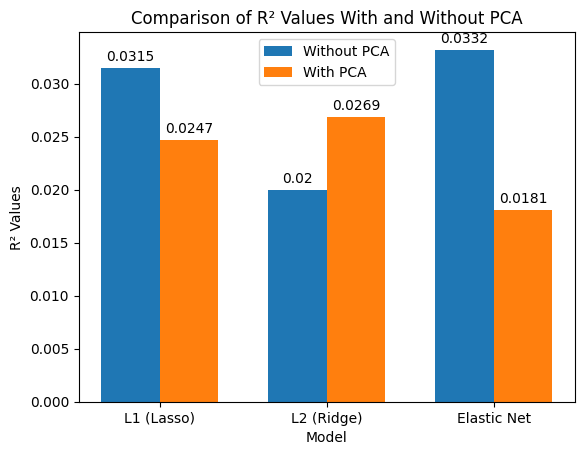

In [189]:
compare_pca_rg = {
    "Model": ["L1 (Lasso)", "L2 (Ridge)", "Elastic Net"],
    "Without PCA": [0.0315, 0.02, 0.0332],
    "With PCA": [0.0247, 0.0269, 0.0181]
}
compare_pca_rg = pd.DataFrame(compare_pca_rg)

# Setting up the plot
fig, ax = plt.subplots()

# Plotting the data
x = list(range(len(compare_pca_rg)))  # convert range to list
width = 0.35  # the width of the bars

rects1 = ax.bar([xi - width/2 for xi in x], compare_pca_rg['Without PCA'], width, label='Without PCA')
rects2 = ax.bar([xi + width/2 for xi in x], compare_pca_rg['With PCA'], width, label='With PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('R² Values')
ax.set_title('Comparison of R² Values With and Without PCA')
ax.set_xticks(x)
ax.set_xticklabels(compare_pca_rg['Model'])
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Showing the plot
plt.show()

## Training and Visualizing a Decision Tree - How Decision Tree Makes Prediction

without pca


In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 0)

In [222]:
from sklearn.tree import DecisionTreeClassifier

In [223]:
# The depth of a tree is the longest path from the root node to the leaf node.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

In [224]:
# Step 2: train the model on the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [225]:
# Make predictions on the test set
y_pred = tree.predict(X_test)

In [226]:
# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.38      0.09      0.14        58
           2       0.71      0.95      0.81       153

    accuracy                           0.69       216
   macro avg       0.37      0.34      0.32       216
weighted avg       0.61      0.69      0.61       216



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with pca

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca , y, test_size = 0.3, random_state = 0)

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
# The depth of a tree is the longest path from the root node to the leaf node.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

In [218]:
# Step 2: train the model on the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [219]:
# Make predictions on the test set
y_pred = tree.predict(X_test)

In [220]:
# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.14      0.21        58
           2       0.72      0.93      0.81       153

    accuracy                           0.69       216
   macro avg       0.37      0.36      0.34       216
weighted avg       0.62      0.69      0.63       216



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support:Support is the actual number of occurrences of the class in the specified dataset. It's the number of true instances for each class

Macro Average:This is the average of the metric independently for each class then take the average

Weighted Avg:This accounts for class imbalance by weighting the average of the metric in favor of the majority classes

In [202]:
from sklearn.tree import plot_tree, export_text

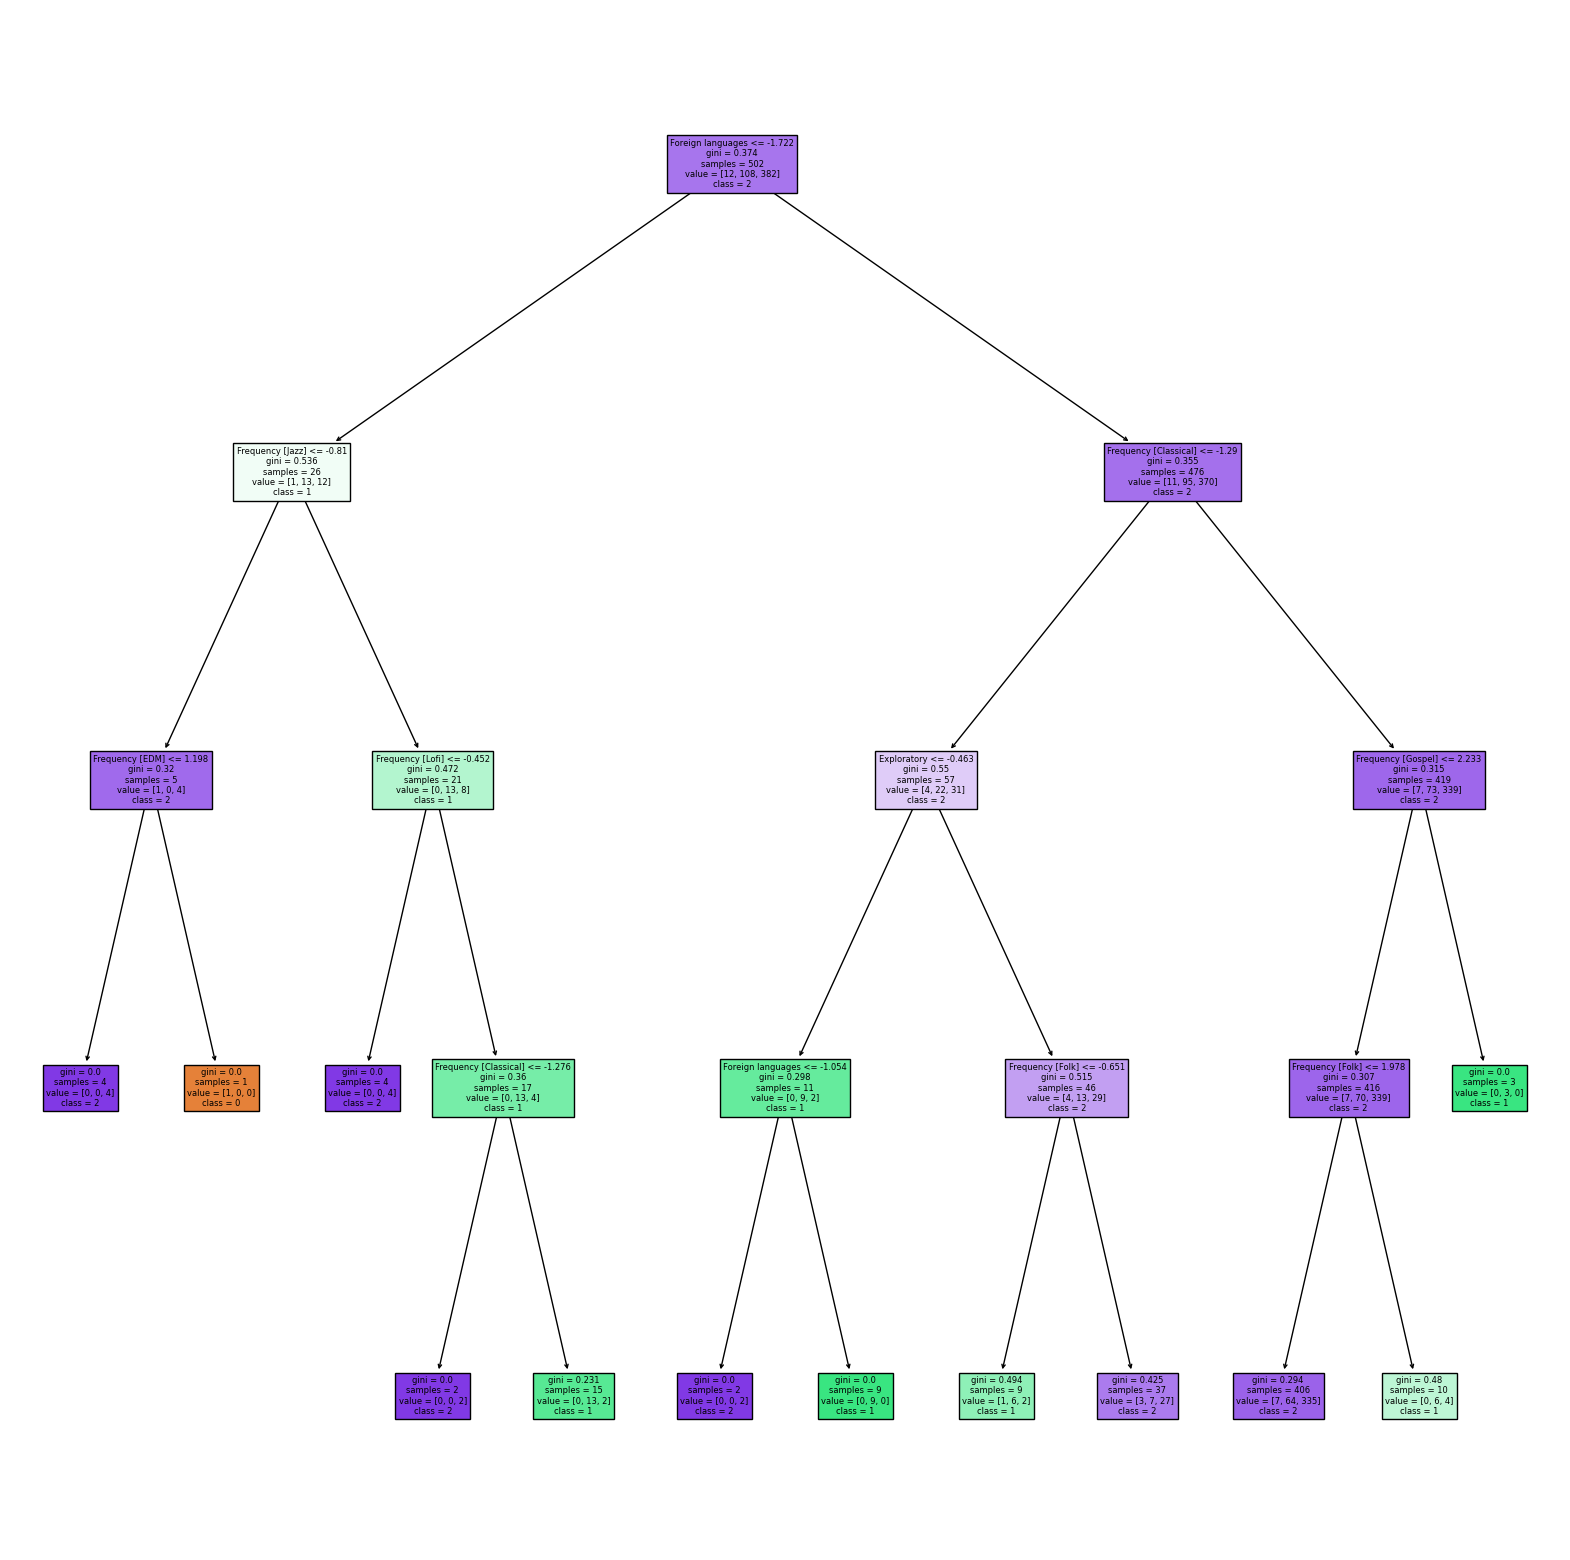

In [203]:
feature_names=features_Xs
class_names=['0', '1', '2']
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True);

## Random Forest

with pca

Random undersampling

In [205]:
from imblearn.under_sampling import RandomUnderSampler
# The replacement=False parameter means that sampling will be done without replacement
rus = RandomUnderSampler (replacement = False)
# It reduces the likelihood of duplicating instances in the subsampled dataset
print(X_train.shape)
X_train_subsample, y_train_subsample = rus.fit_resample(X_train, y_train)
print(y_train.shape)
print(X_train_subsample.shape)
# Print Class Distribution of Resampled Data
print(np.bincount(y_train_subsample))

(502, 22)
(502,)
(36, 22)
[12 12 12]


In [206]:
lr = LogisticRegression().fit(X_train_subsample, y_train_subsample)
y_pred_lr = lr.predict(X_test)

In [207]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

recall_lr = recall_score(y_test, y_pred_lr, average='macro')
print(f'recall: {recall_knn}')

precision_lr = precision_score(y_test, y_pred_lr, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_lr}')

f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f'F1 Score: {f1_lr}')

Accuracy: 0.3101851851851852
Precision: 0.36922816791617946
F1 Score: 0.2738563291345246


over sampling

In [208]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler ()
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)
print (X_train.shape)
print (y_train.shape)
print (X_train_oversample.shape)
print(np.bincount(y_train_oversample))

(502, 22)
(502,)
(1146, 22)
[382 382 382]


In [209]:
lr = LogisticRegression().fit(X_train_oversample, y_train_oversample)
y_pred_lr = lr.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

recall_lr = recall_score(y_test, y_pred_lr, average='macro')
print(f'recall: {recall_knn}')

precision_lr = precision_score(y_test, y_pred_lr, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_lr}')

f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f'F1 Score: {f1_lr}')

Accuracy: 0.4444444444444444
Precision: 0.4043321861954972
F1 Score: 0.3531369033282486


#SMOTE: The Synthetic Minority Oversampling Technique

In [211]:
from imblearn.over_sampling import SMOTE
smote = SMOTE ()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print (X_train.shape)
print (y_train.shape)
print (X_train_smote.shape)
print(np.bincount (y_train_smote))

(502, 22)
(502,)
(1146, 22)
[382 382 382]


In [212]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn. model_selection import cross_validate

In [213]:
lr = LogisticRegression().fit(X_train_smote,y_train_smote)
y_pred_lr = lr.predict(X_test)

In [214]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

recall_lr = recall_score(y_test, y_pred_lr, average='macro')
print(f'recall: {recall_knn}')

precision_lr = precision_score(y_test, y_pred_lr, average='macro')  # 'macro'表示未加權平均
print(f'Precision: {precision_lr}')

f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(f'F1 Score: {f1_lr}')

Accuracy: 0.46296296296296297
Precision: 0.37832167548114026
F1 Score: 0.3408205128205128


compare

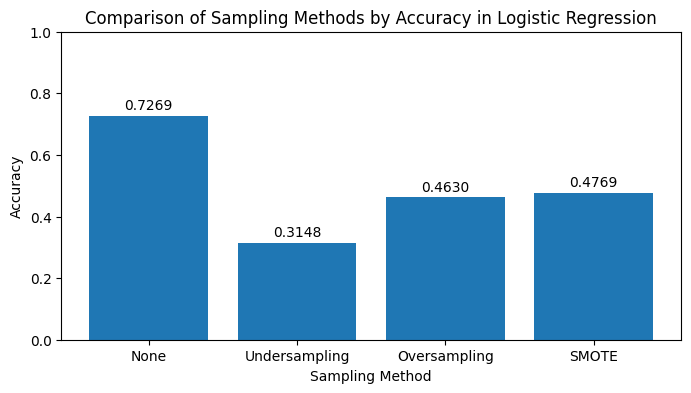

In [4]:
import matplotlib.pyplot as plt
# Data
methods = ['None','Undersampling', 'Oversampling', 'SMOTE']
accuracy = [0.726852, 0.3148, 0.463, 0.4769]

# Creating the bar chart
plt.figure(figsize=(8, 4))
plt.xlabel('Sampling Method')
plt.ylabel('Accuracy')
plt.bar(methods, accuracy)
plt.title('Comparison of Sampling Methods by Accuracy in Logistic Regression')
plt.ylim(0, 1)  # Set the limit for the y-axis to make differences more visible

# Adding text labels for each bar's accuracy value
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha = 'center', va = 'bottom')

# Show the plot
plt.show()